## CNN examples for course Deep Learning Fundamentals and Basic Tools

We will use the CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.utils.vis_utils import plot_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Utility functions:

In [3]:
def plot_training_curves(hd):
  nepochs = len(hd['acc'])
  epochs = range(1, nepochs+1)

  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs, hd['acc'], "r", label="train")
  plt.plot(epochs, hd['val_acc'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("Accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, hd['loss'], "r", label="train")
  plt.plot(epochs, hd['val_loss'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Loss")
  plt.legend()

  plt.show()

In [4]:
def plot_predictions(model, images, images_orig, labels, class_names):
  predictions = model.predict(images)
  num_images = images.shape[0]

  for i in range(num_images):
    plt.figure(figsize=(16, 3))

    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_orig[i])
    plt.title("%d [%s]" % (labels[i], class_names[labels[i]]))

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), predictions[i])
    plt.xticks(ticks=np.arange(10), labels=class_names)
    plt.grid(True)
              
    plt.show()

Data loading, the dataset is included in Keras (https://keras.io/api/datasets/cifar10/):

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airpl', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape)
print(train_labels.shape)
for t in train_labels[:10]:
  print(t[0], class_names[t[0]])

print(test_images.shape)
print(test_labels.shape)
for t in test_labels[:10]:
  print(t[0], class_names[t[0]])

170508288/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)
(50000, 1)
6 frog
9 truck
9 truck
4 deer
1 auto
1 auto
2 bird
7 horse
8 ship
3 cat
(10000, 32, 32, 3)
(10000, 1)
3 cat
8 ship
8 ship
0 airpl
6 frog
6 frog
1 auto
6 frog
3 cat
1 auto


Let us visualize some of the images:

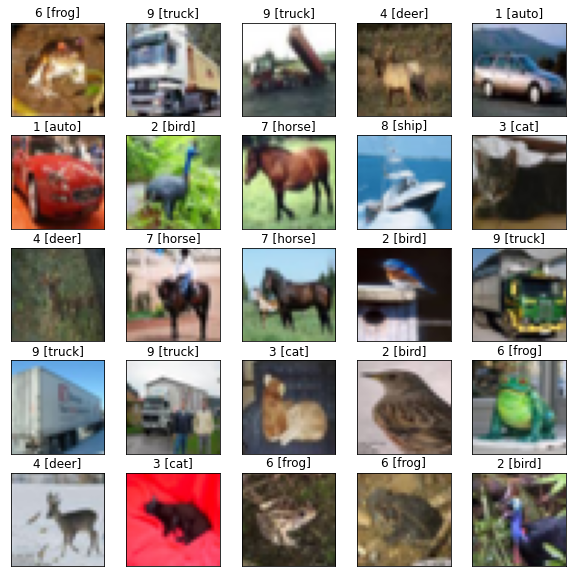

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title("%d [%s]" % (train_labels[i][0], class_names[train_labels[i][0]]))

Normalization:

In [7]:
train_images_orig = train_images
test_images_orig = test_images
mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

One-hot classes:

In [8]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, 10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, 10)

In [9]:
train_labels_one_hot.shape

(50000, 10)

In [10]:
test_labels_one_hot.shape

(10000, 10)

## Naive approach: Fully connected network

Model definition:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 3072)              0         
                                                                 
 hidden (Dense)              (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None


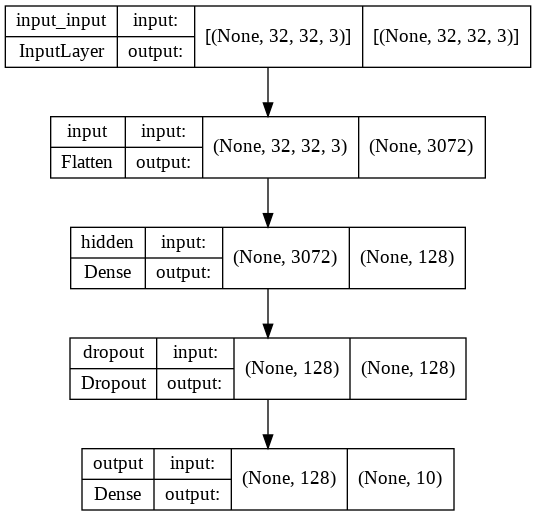

In [ ]:
K.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3), name="input"))
model.add(keras.layers.Dense(128, activation="relu", name="hidden"))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 4s 17ms/step - loss: 80.1182 - acc: 0.2650 - val_loss: 30.0608 - val_acc: 0.3563
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 33.9344 - acc: 0.3155 - val_loss: 21.9998 - val_acc: 0.3607
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 25.9419 - acc: 0.3377 - val_loss: 16.8465 - val_acc: 0.3857
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 21.2156 - acc: 0.3478 - val_loss: 14.6238 - val_acc: 0.3883
Epoch 5/50
50/50 [==============================] - 1s 12ms/step - loss: 16.7659 - acc: 0.3627 - val_loss: 13.9944 - val_acc: 0.3776
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 13.3601 - acc: 0.3754 - val_loss: 9.6634 - val_acc: 0.4046
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 10.4304 - acc: 0.3899 - val_loss: 7.8704 - val_acc: 0.4042
Epoch 8/50
50/50 [==============================] - 1s 10ms/step - loss

Plots:

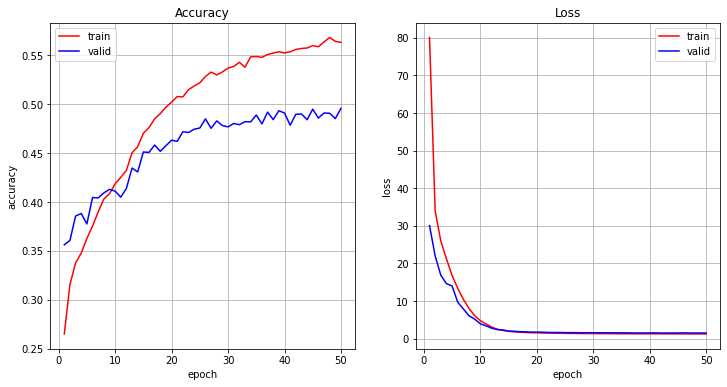

In [ ]:
plot_training_curves(history.history)

Confusion matrices:

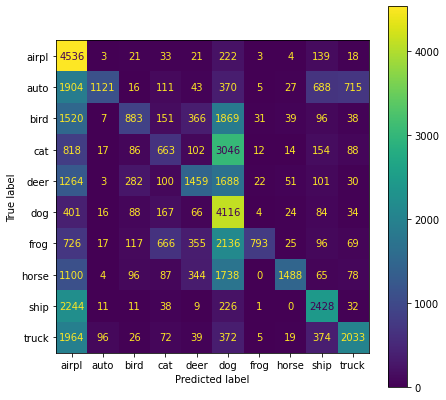

In [ ]:
train_predictions = np.argmax(model.predict(train_images), axis=1)

cm = confusion_matrix(train_labels, train_predictions, labels=np.unique(train_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(7)
fig.set_figheight(7)  
plt.show()

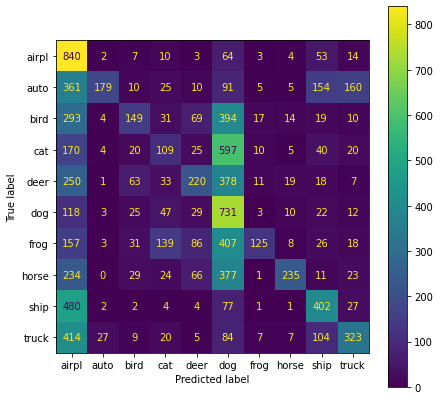

In [ ]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(7)
fig.set_figheight(7)  
plt.show()

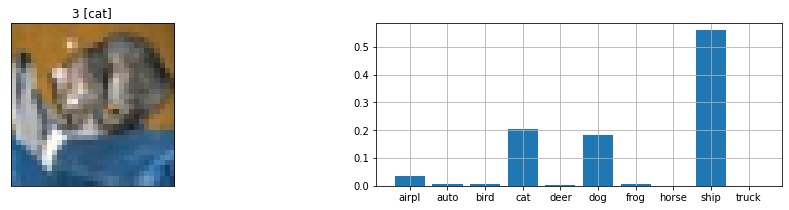

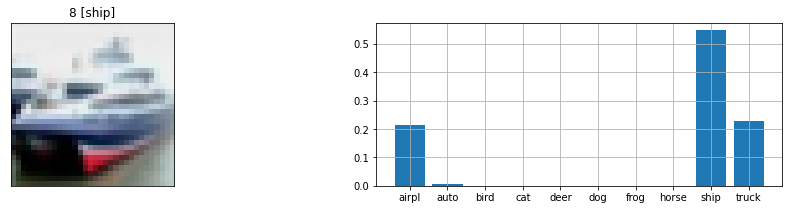

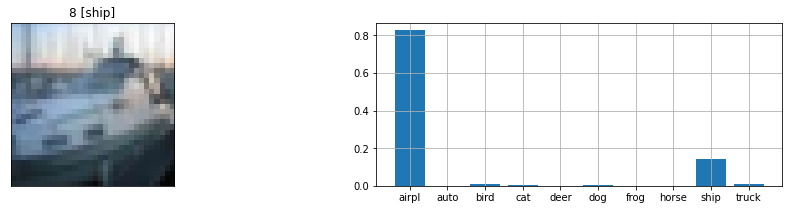

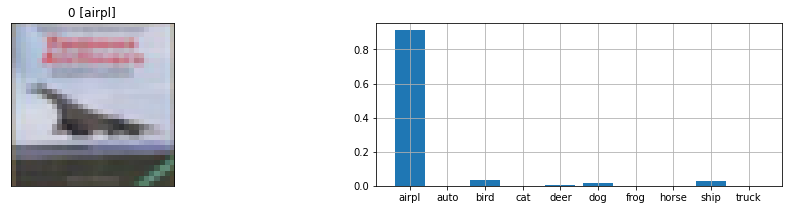

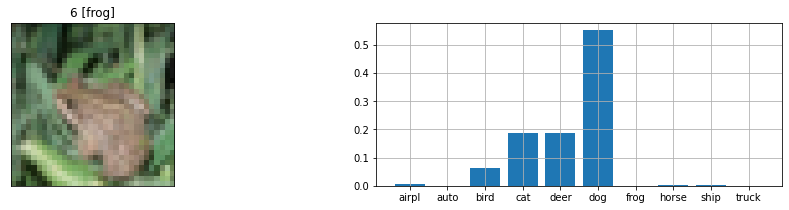

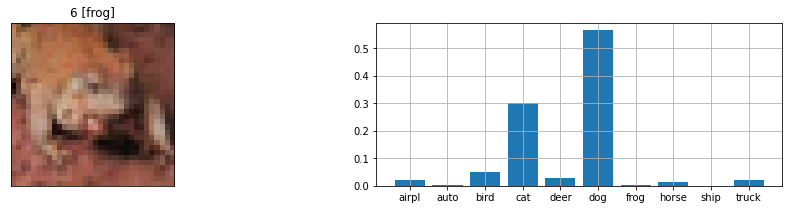

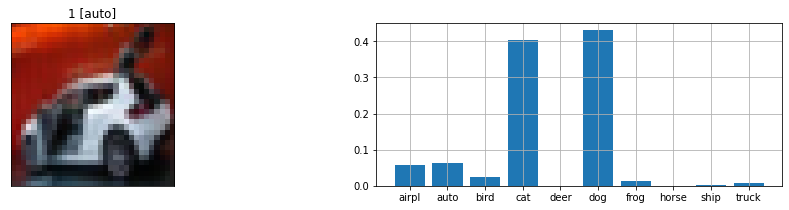

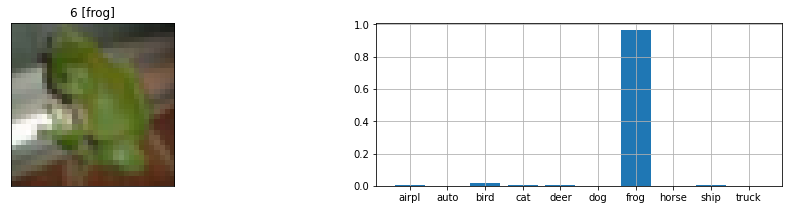

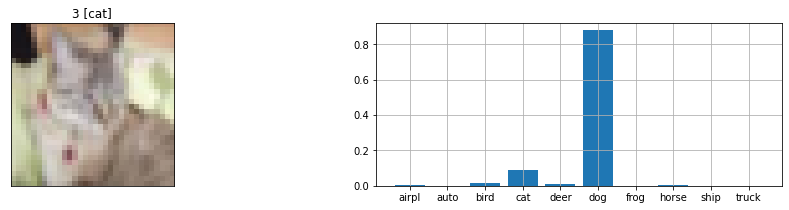

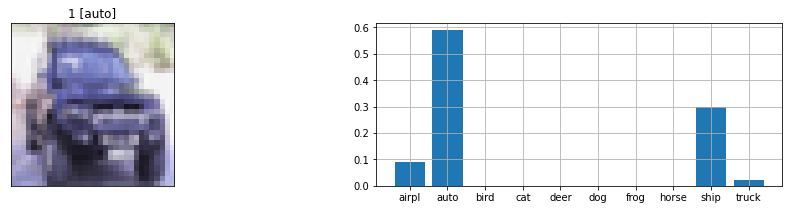

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## CNN built from scratch:

Model definition:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

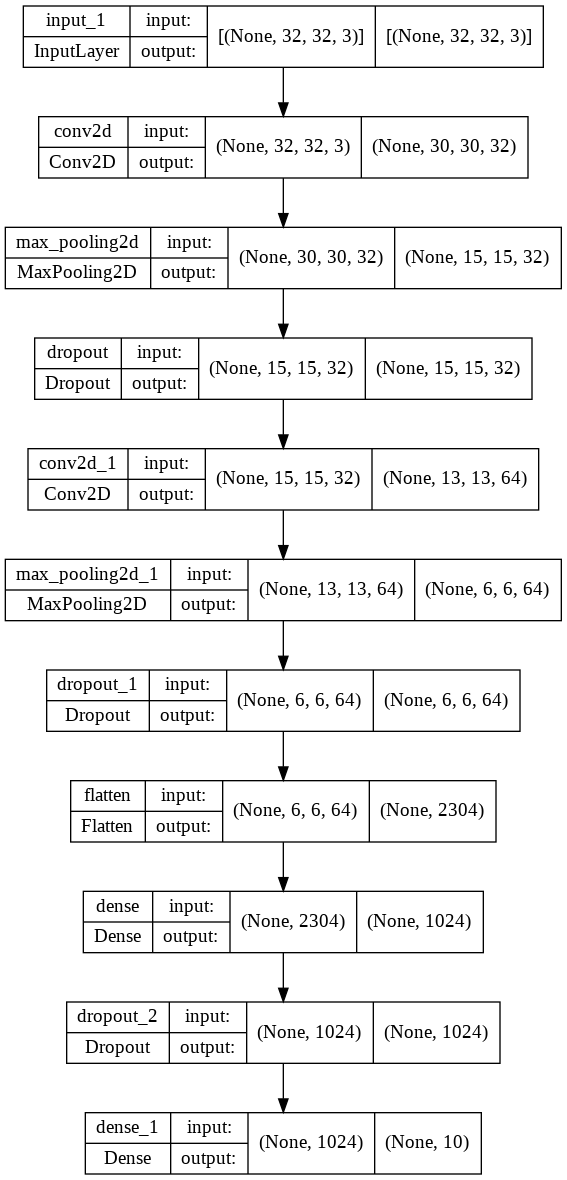

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 14s 44ms/step - loss: 16.2566 - acc: 0.1064 - val_loss: 2.3023 - val_acc: 0.0982
Epoch 2/50
50/50 [==============================] - 2s 34ms/step - loss: 2.2759 - acc: 0.1232 - val_loss: 2.2992 - val_acc: 0.1081
Epoch 3/50
50/50 [==============================] - 2s 37ms/step - loss: 2.1844 - acc: 0.1880 - val_loss: 2.2203 - val_acc: 0.1901
Epoch 4/50
50/50 [==============================] - 2s 35ms/step - loss: 2.0804 - acc: 0.2540 - val_loss: 2.0940 - val_acc: 0.2620
Epoch 5/50
50/50 [==============================] - 2s 34ms/step - loss: 1.9861 - acc: 0.2862 - val_loss: 1.9486 - val_acc: 0.3259
Epoch 6/50
50/50 [==============================] - 2s 37ms/step - loss: 1.8936 - acc: 0.3167 - val_loss: 1.8937 - val_acc: 0.3444
Epoch 7/50
50/50 [==============================] - 2s 34ms/step - loss: 1.8319 - acc: 0.3388 - val_loss: 1.7780 - val_acc: 0.3695
Epoch 8/50
50/50 [==============================] - 2s 34ms/step - loss: 1.7682 -

Plots:

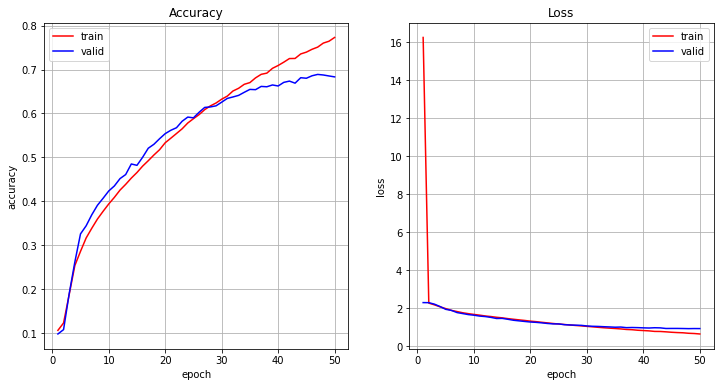

In [ ]:
plot_training_curves(history.history)

Confusion matrix (test):

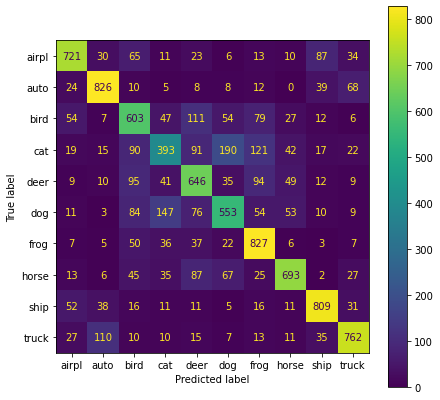

In [ ]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(7)
fig.set_figheight(7)  
plt.show()

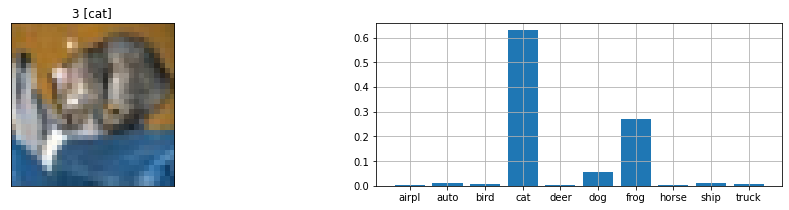

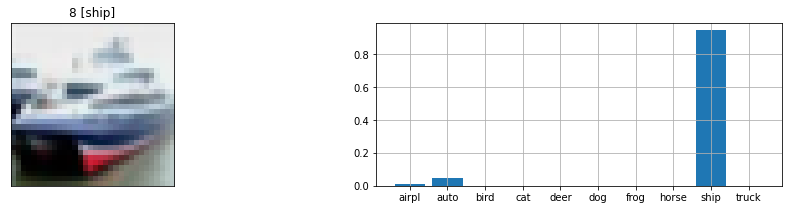

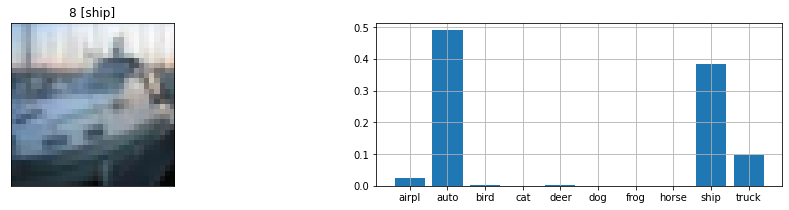

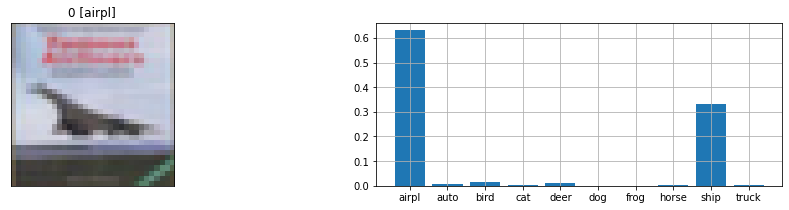

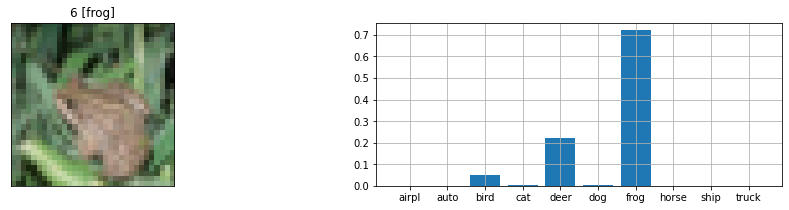

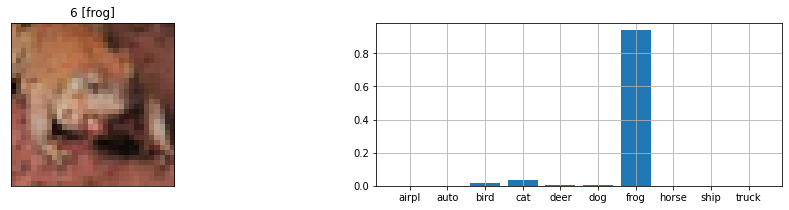

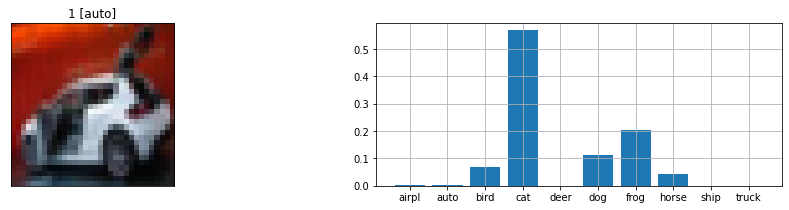

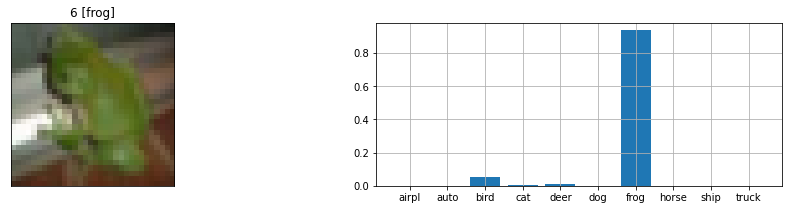

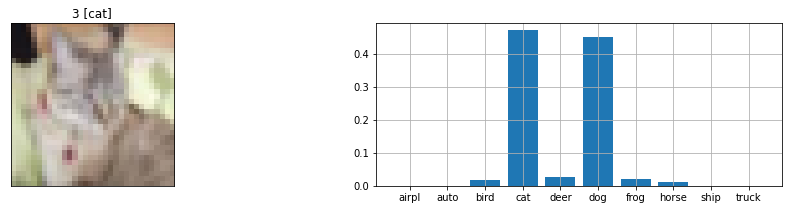

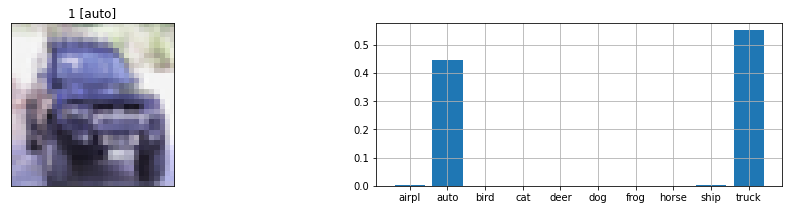

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## A more complex model that overfits the data

Model definition:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

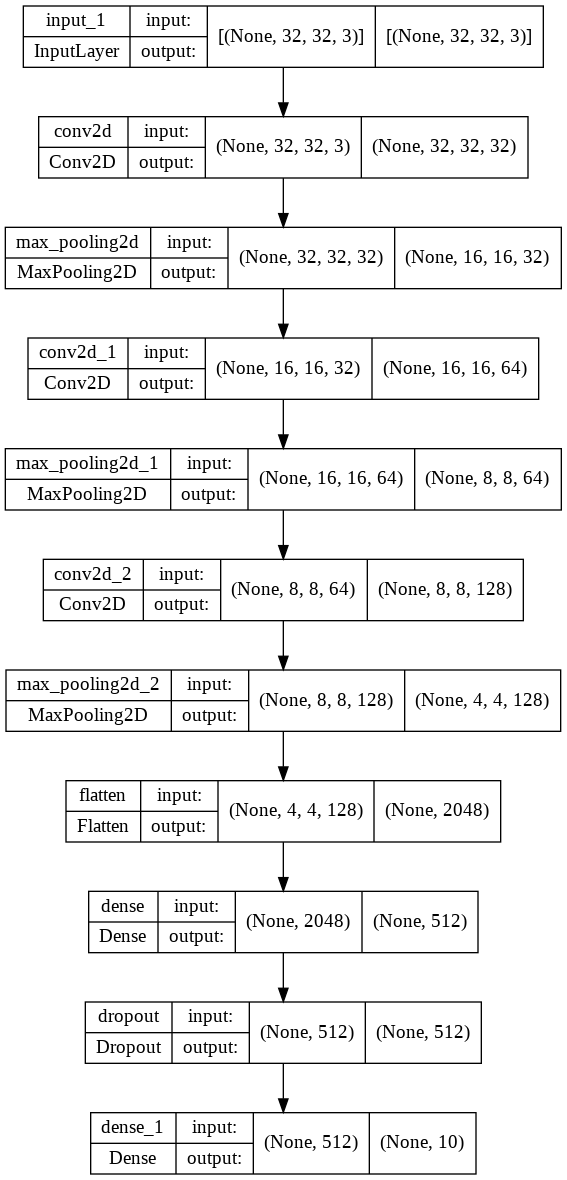

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 3s 46ms/step - loss: 5.2969 - acc: 0.2331 - val_loss: 1.6549 - val_acc: 0.4073
Epoch 2/50
50/50 [==============================] - 2s 39ms/step - loss: 1.5959 - acc: 0.4262 - val_loss: 1.4118 - val_acc: 0.4989
Epoch 3/50
50/50 [==============================] - 2s 42ms/step - loss: 1.4090 - acc: 0.4969 - val_loss: 1.2804 - val_acc: 0.5403
Epoch 4/50
50/50 [==============================] - 2s 39ms/step - loss: 1.2907 - acc: 0.5437 - val_loss: 1.1936 - val_acc: 0.5732
Epoch 5/50
50/50 [==============================] - 2s 39ms/step - loss: 1.1924 - acc: 0.5776 - val_loss: 1.1214 - val_acc: 0.6010
Epoch 6/50
50/50 [==============================] - 2s 42ms/step - loss: 1.1167 - acc: 0.6069 - val_loss: 1.0836 - val_acc: 0.6190
Epoch 7/50
50/50 [==============================] - 2s 41ms/step - loss: 1.0419 - acc: 0.6346 - val_loss: 1.0382 - val_acc: 0.6325
Epoch 8/50
50/50 [==============================] - 2s 42ms/step - loss: 0.9784 - a

Plots:

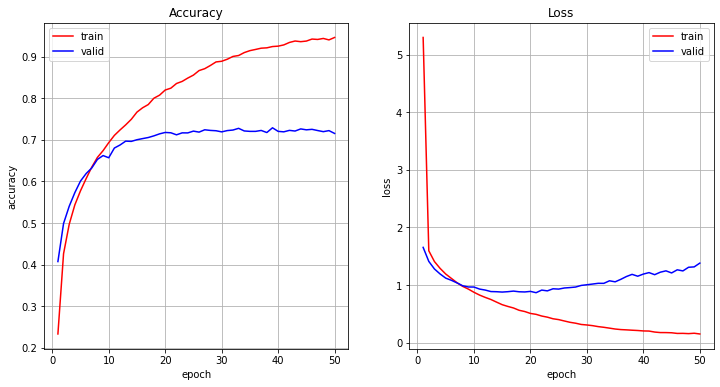

In [ ]:
plot_training_curves(history.history)

Confusion matrix (test):

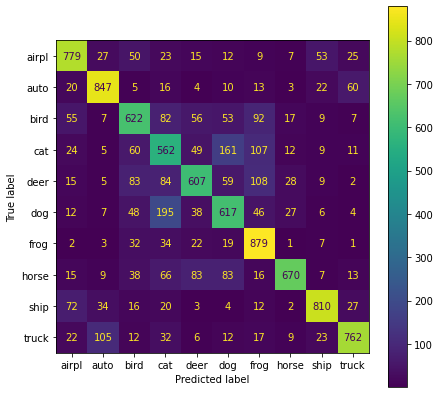

In [ ]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(7)
fig.set_figheight(7)  
plt.show()

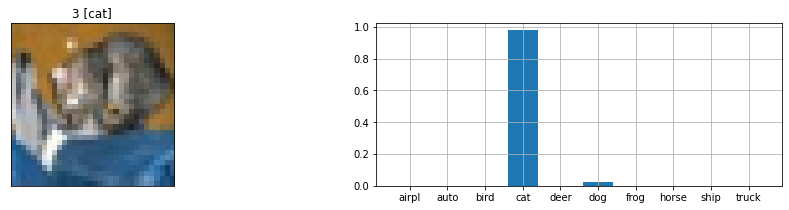

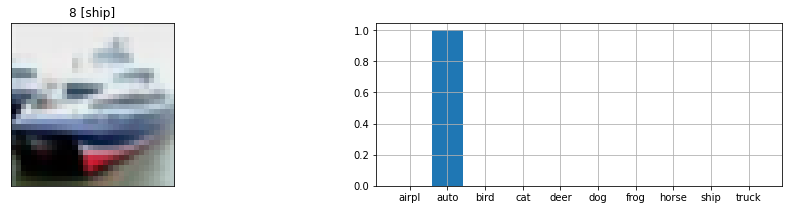

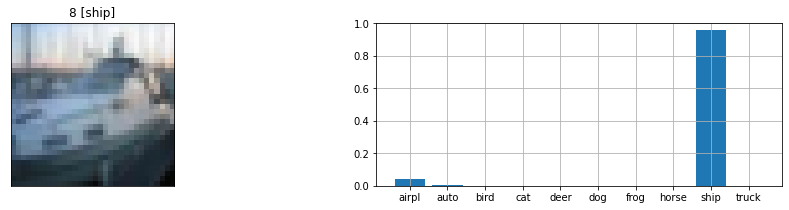

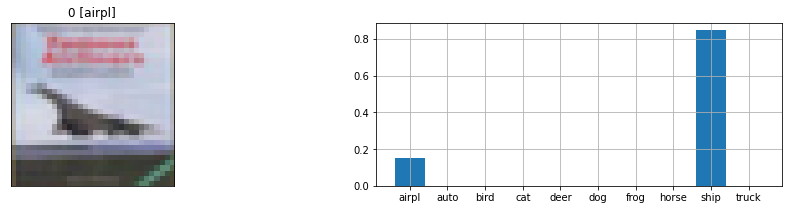

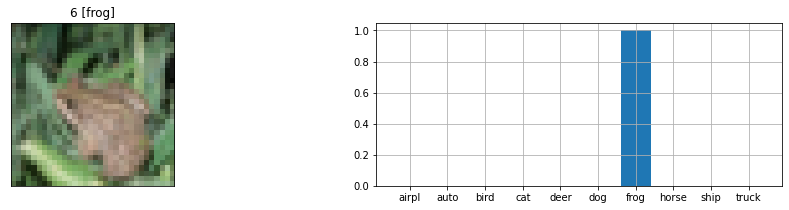

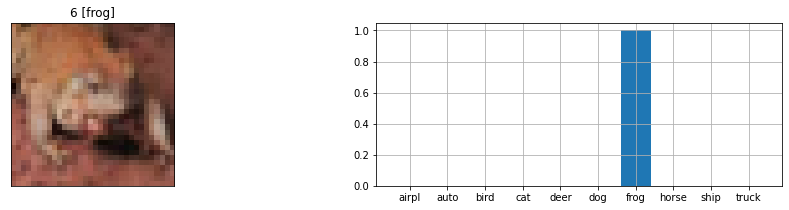

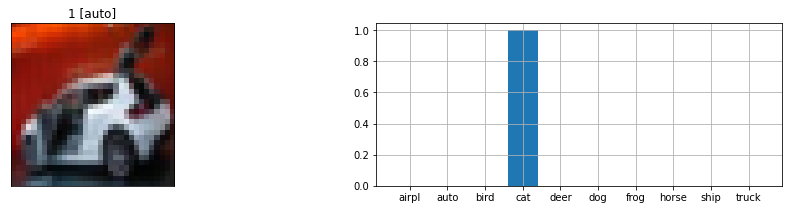

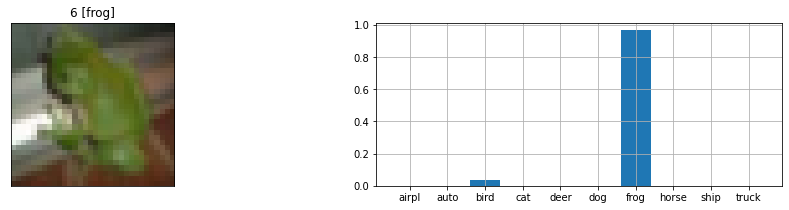

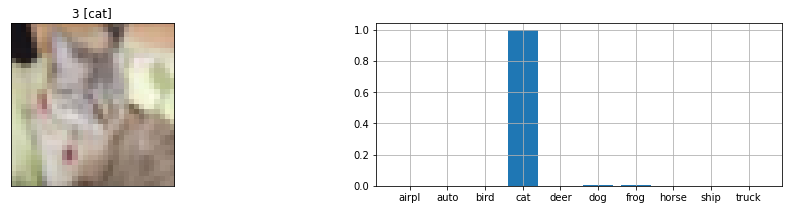

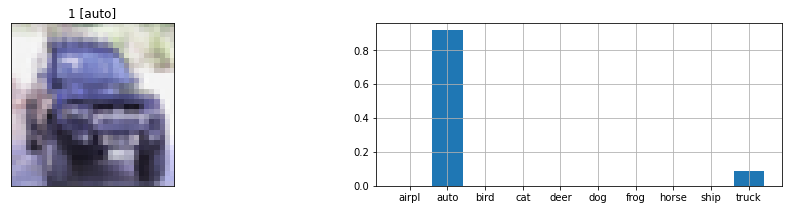

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Data augmentation

In [63]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             rotation_range=15, 
                             horizontal_flip=True)

In [ ]:
iter = datagen.flow(train_images_orig[:10], train_labels[:10], batch_size=10)

Plot original images:

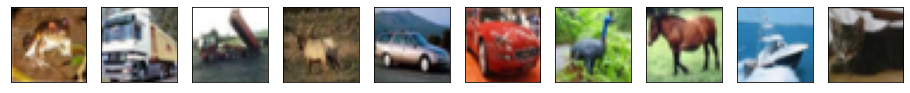

In [ ]:
plt.figure(figsize=(16, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_orig[i])

Plot randomly augmented images:

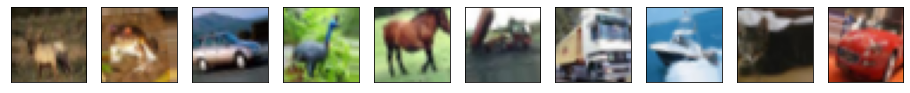

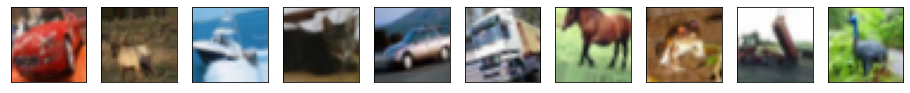

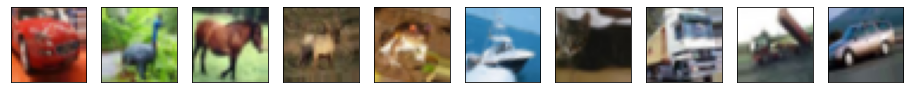

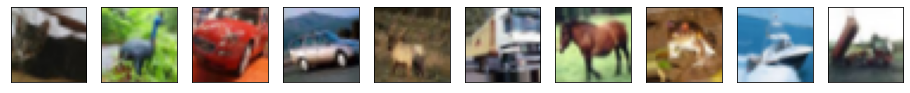

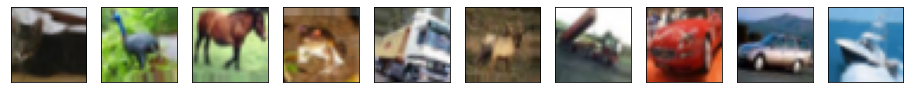

In [ ]:
for k in range(5):
  im, lbl = iter.next()
  plt.figure(figsize=(16, 3))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(im[i], dtype=int))

Let us see if augmentation improves our model:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

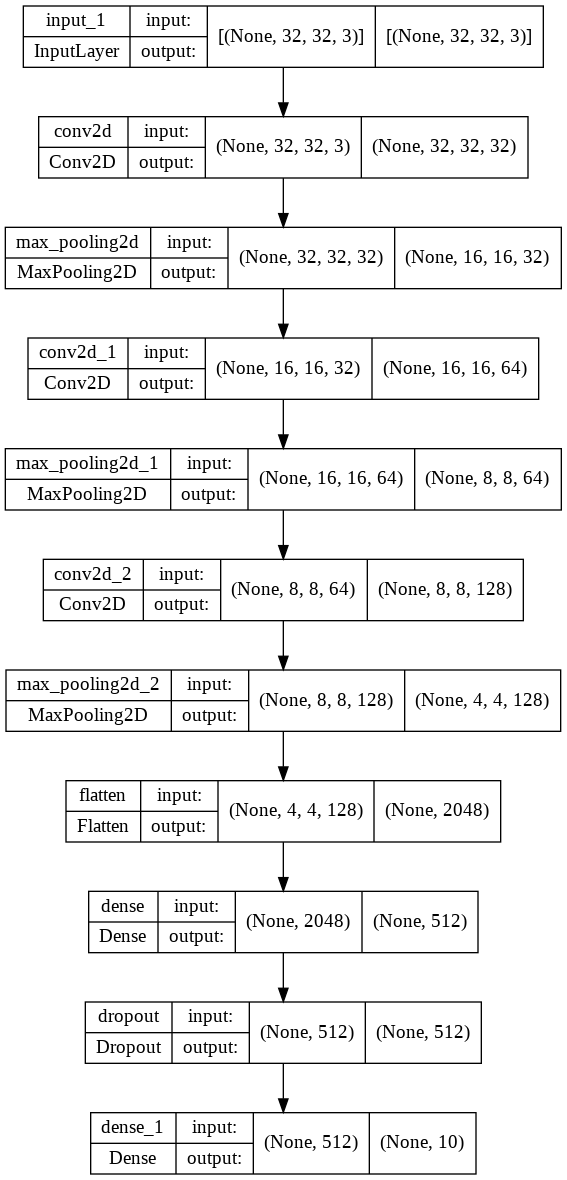

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Iterator that generates batches:

In [ ]:
iter = datagen.flow(train_images, train_labels_one_hot, batch_size=1000)

Training:

In [ ]:
nepochs = 50
history = model.fit(iter, 
                    epochs=nepochs, 
                    steps_per_epoch=50,
                    validation_data=(test_images, test_labels_one_hot))

Epoch 1/50
50/50 [==============================] - 22s 438ms/step - loss: 4.8481 - acc: 0.2285 - val_loss: 1.7250 - val_acc: 0.3839
Epoch 2/50
50/50 [==============================] - 21s 415ms/step - loss: 1.7137 - acc: 0.3817 - val_loss: 1.4700 - val_acc: 0.4704
Epoch 3/50
50/50 [==============================] - 21s 420ms/step - loss: 1.5586 - acc: 0.4367 - val_loss: 1.3574 - val_acc: 0.5083
Epoch 4/50
50/50 [==============================] - 26s 524ms/step - loss: 1.4738 - acc: 0.4717 - val_loss: 1.2754 - val_acc: 0.5421
Epoch 5/50
50/50 [==============================] - 21s 413ms/step - loss: 1.4069 - acc: 0.4980 - val_loss: 1.2597 - val_acc: 0.5456
Epoch 6/50
50/50 [==============================] - 21s 424ms/step - loss: 1.3562 - acc: 0.5151 - val_loss: 1.2019 - val_acc: 0.5768
Epoch 7/50
50/50 [==============================] - 20s 409ms/step - loss: 1.3076 - acc: 0.5338 - val_loss: 1.1743 - val_acc: 0.5813
Epoch 8/50
50/50 [==============================] - 21s 421ms/step - 

Plots:

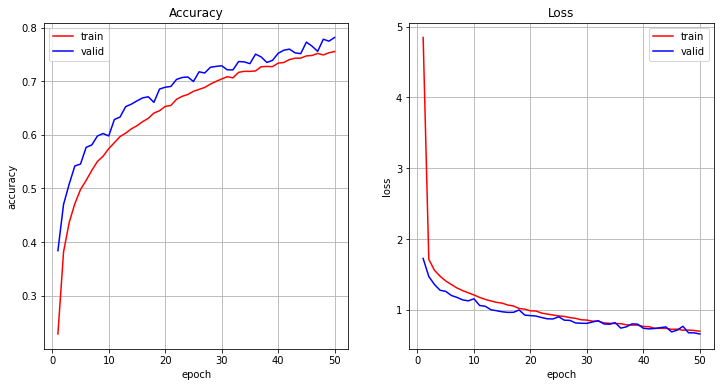

In [ ]:
plot_training_curves(history.history)

Confusion matrix (test):

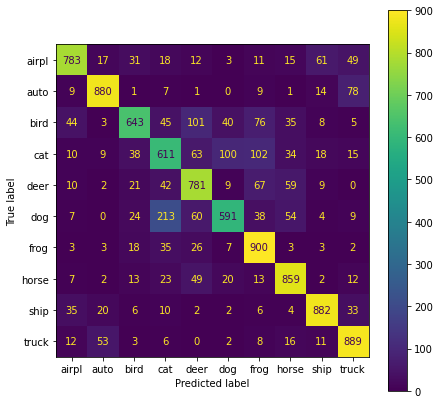

In [ ]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(7)
fig.set_figheight(7)  
plt.show()

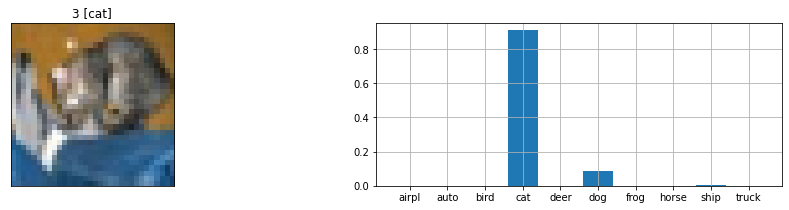

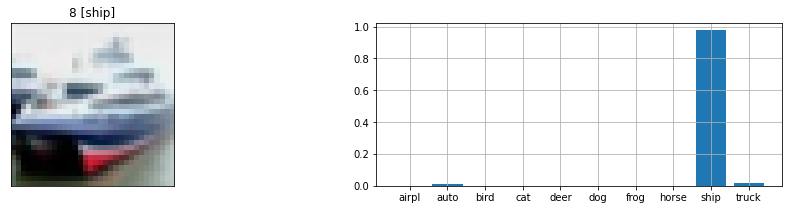

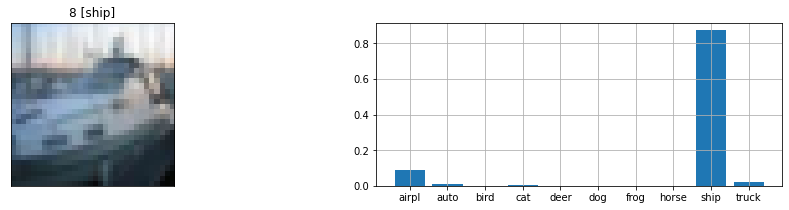

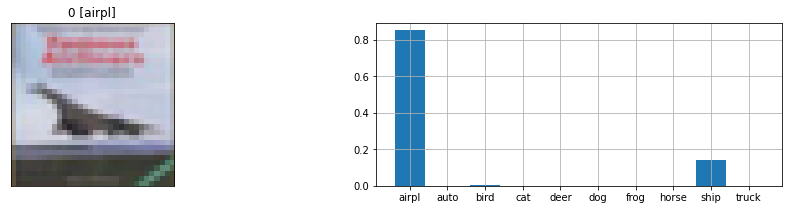

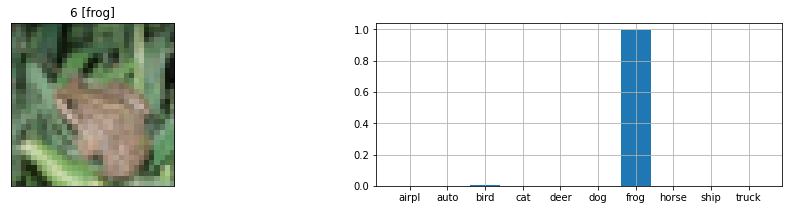

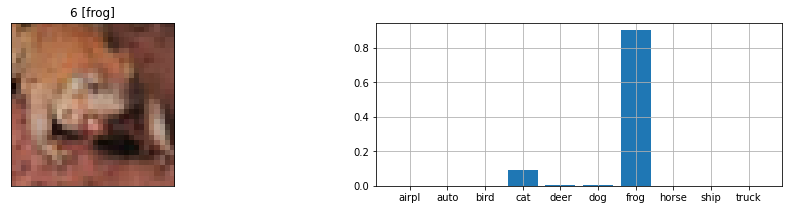

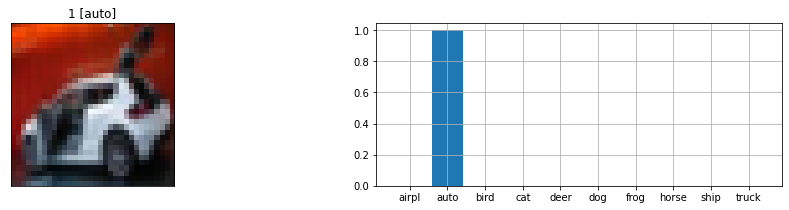

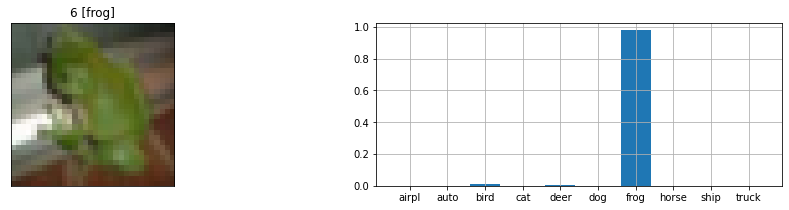

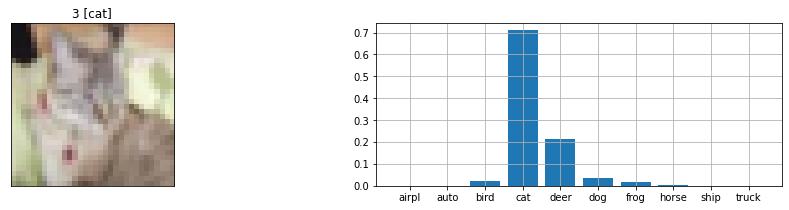

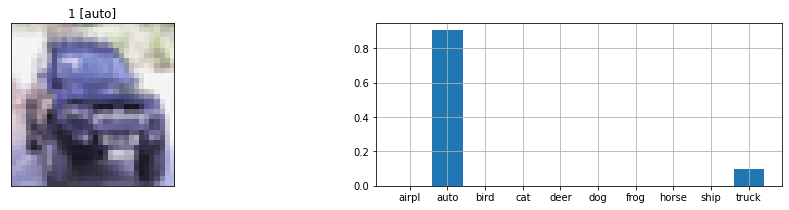

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features.

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image

size = 48
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

# Upsample:
x_train = np.array([np.array(Image.fromarray(x).resize(size=(size, size))) for x in train_images_orig])
x_test = np.array([np.array(Image.fromarray(x).resize(size=(size, size))) for x in test_images_orig])

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

features_train = vgg.predict(x_train).reshape((50000, 512))
features_test = vgg.predict(x_test).reshape((10000, 512))

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
print(features_train.shape)
print(features_test.shape)

(50000, 512)
(10000, 512)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 1024)              525312    
                                                                 
 dropout-1 (Dropout)         (None, 1024)              0         
                                                                 
 hidden-2 (Dense)            (None, 256)               262400    
                                                                 
 dropout-2 (Dropout)         (None, 256)               0         
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 790,282
Trainable params: 790,282
Non-trainable params: 0
_________________________________________________________________
None


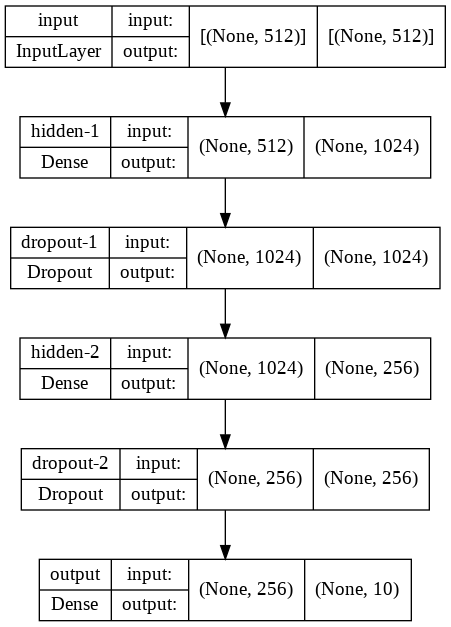

In [58]:
K.clear_session()

L1=0.0005
L2=0.001

model = keras.Sequential()
model.add(keras.layers.Input(shape=(512,), name="input"))
model.add(keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2), name="hidden-1"))
model.add(keras.layers.Dropout(rate=0.2, name="dropout-1"))
model.add(keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2), name="hidden-2"))
model.add(keras.layers.Dropout(rate=0.2, name="dropout-2"))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [59]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [60]:
nepochs = 50
history = model.fit(features_train, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(features_test, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 1s 10ms/step - loss: 19.2518 - acc: 0.3234 - val_loss: 15.5527 - val_acc: 0.5407
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 15.8805 - acc: 0.4744 - val_loss: 14.8319 - val_acc: 0.5617
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 15.0780 - acc: 0.4998 - val_loss: 14.4939 - val_acc: 0.5717
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 14.5942 - acc: 0.5327 - val_loss: 14.1855 - val_acc: 0.5912
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 14.2141 - acc: 0.5560 - val_loss: 13.8641 - val_acc: 0.6110
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 13.8461 - acc: 0.5772 - val_loss: 13.5350 - val_acc: 0.6221
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 13.4924 - acc: 0.5931 - val_loss: 13.1964 - val_acc: 0.6383
Epoch 8/50
50/50 [==============================] - 0s 6ms/step - loss: 13.

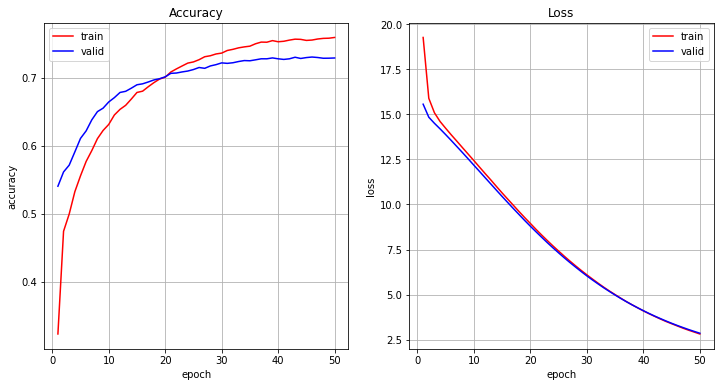

In [61]:
plot_training_curves(history.history)

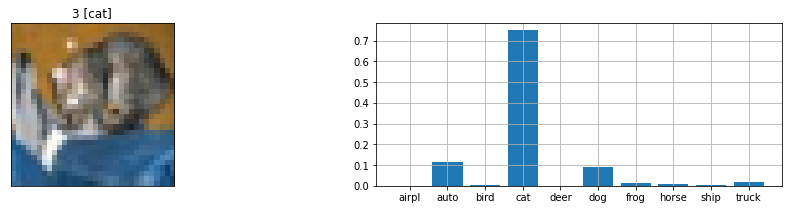

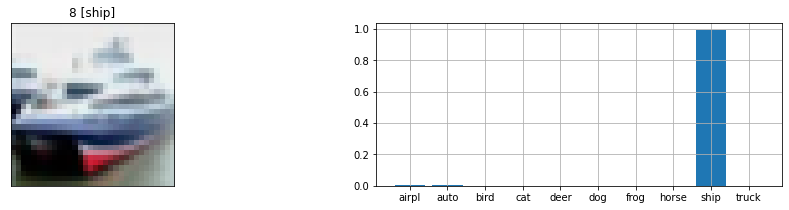

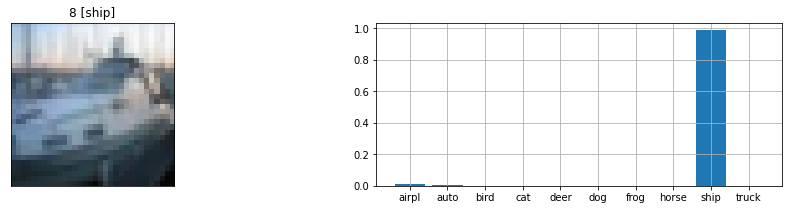

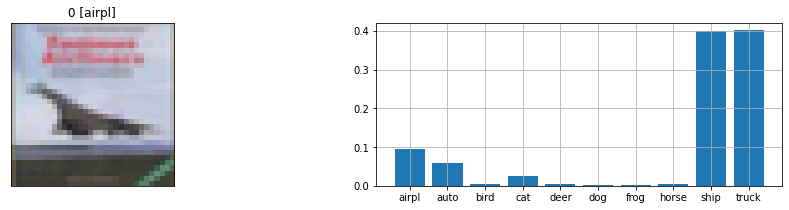

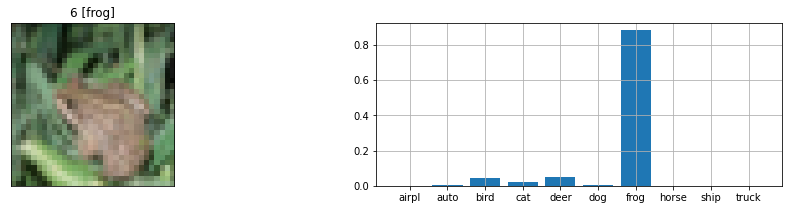

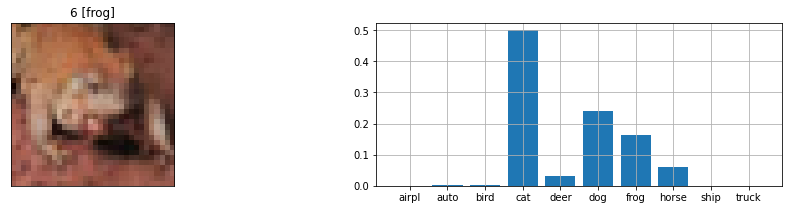

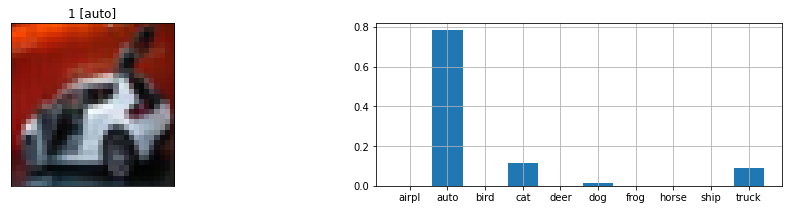

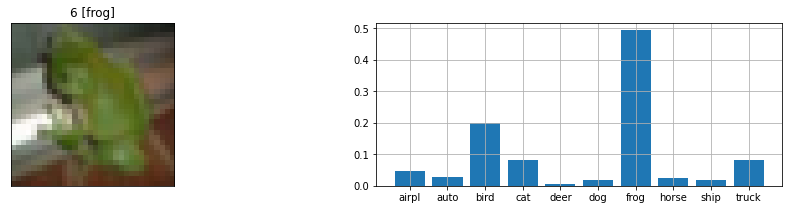

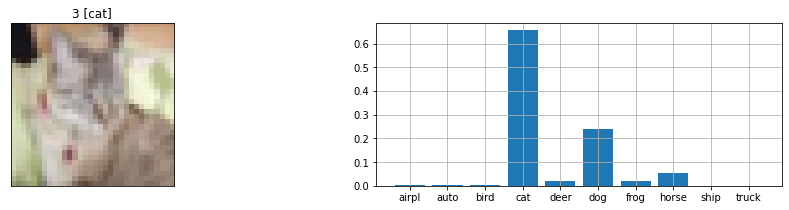

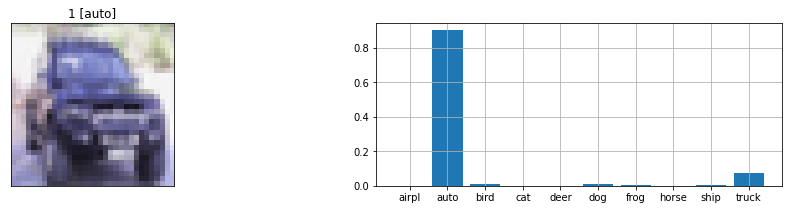

In [62]:
plot_predictions(model, features_test[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model (II)

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features. We also use data augmentation.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

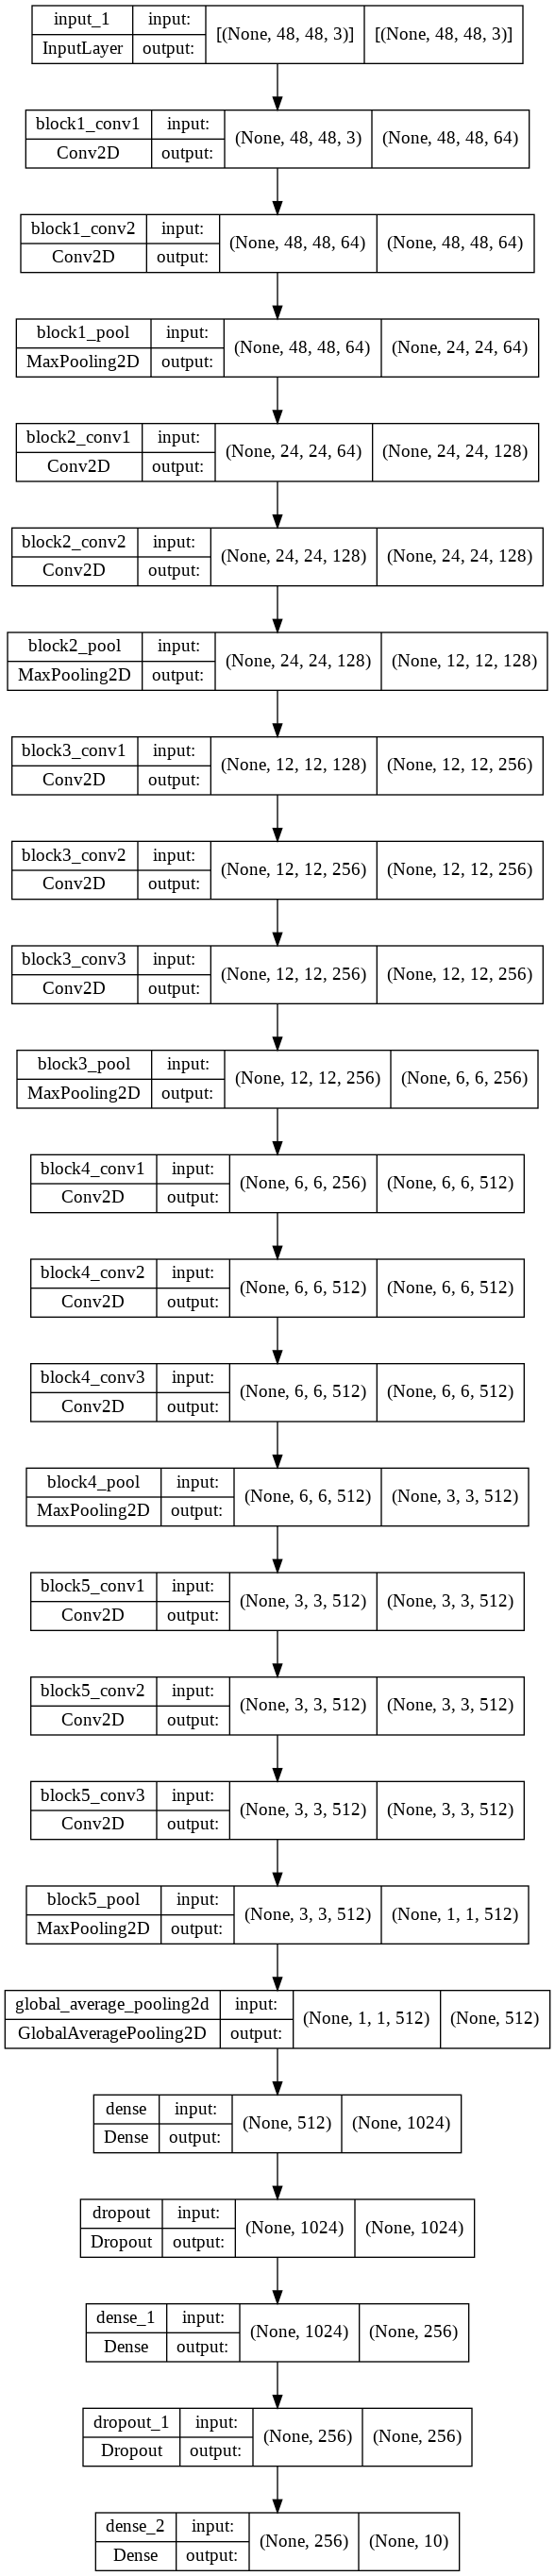

In [70]:
K.clear_session()

size = 48
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

for layer in vgg.layers:
  layer.trainable = False
    
x = vgg.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2))(x)
x = keras.layers.Dropout(rate=0.2)(x)
x = keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2))(x)
x = keras.layers.Dropout(rate=0.2)(x)

pred = keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(vgg.input, pred)

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [71]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [72]:
iter = datagen.flow(x_train, train_labels_one_hot, batch_size=1000)

In [73]:
nepochs = 50
history = model.fit(iter, 
                    epochs=nepochs, 
                    steps_per_epoch=50,
                    validation_data=(x_test, test_labels_one_hot))

Epoch 1/50
50/50 [==============================] - 50s 903ms/step - loss: 18.8682 - acc: 0.3038 - val_loss: 15.4484 - val_acc: 0.5324
Epoch 2/50
50/50 [==============================] - 43s 859ms/step - loss: 15.8760 - acc: 0.4285 - val_loss: 14.8107 - val_acc: 0.5463
Epoch 3/50
50/50 [==============================] - 43s 859ms/step - loss: 15.1057 - acc: 0.4558 - val_loss: 14.4838 - val_acc: 0.5648
Epoch 4/50
50/50 [==============================] - 44s 884ms/step - loss: 14.6608 - acc: 0.4835 - val_loss: 14.1492 - val_acc: 0.5865
Epoch 5/50
50/50 [==============================] - 43s 857ms/step - loss: 14.2669 - acc: 0.5093 - val_loss: 13.8001 - val_acc: 0.6062
Epoch 6/50
50/50 [==============================] - 43s 860ms/step - loss: 13.8858 - acc: 0.5312 - val_loss: 13.4549 - val_acc: 0.6190
Epoch 7/50
50/50 [==============================] - 43s 861ms/step - loss: 13.5213 - acc: 0.5473 - val_loss: 13.0990 - val_acc: 0.6326
Epoch 8/50
50/50 [==============================] - 50s

Plots:

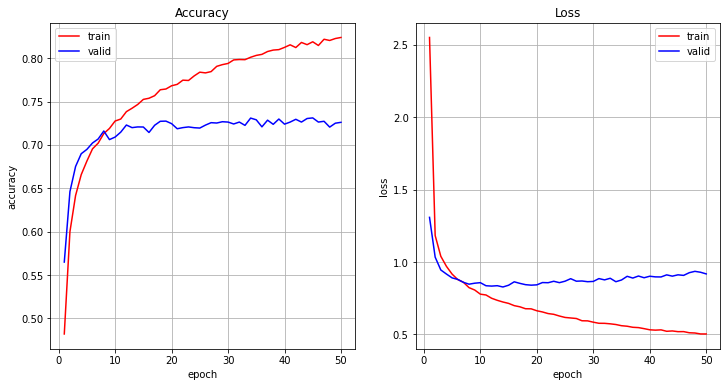

In [ ]:
plot_training_curves(history.history)